<a href="https://colab.research.google.com/github/Vixuz144/Econometria/blob/main/Regresi%C3%B3n_lineal_migraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy.stats import t

In [431]:
base1 = pd.read_excel('Datos.xlsx')

In [432]:
primera_fecha = datetime.datetime.fromisoformat("2010-01-01")
ultima_fecha = datetime.datetime.fromisoformat("2024-11-01")
print(primera_fecha)
print(ultima_fecha)

2010-01-01 00:00:00
2024-11-01 00:00:00


In [433]:
a = base1.to_numpy()
m = a[:,0]

base = np.delete(a, 0, 1)

l = list(base[:,0])
n = len(base[:,1])

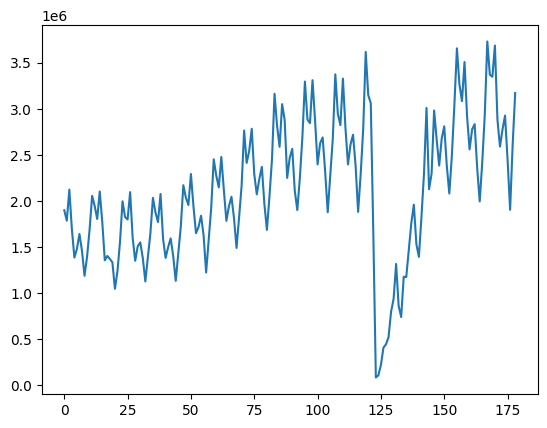

In [434]:
plt.plot(base[:,0])
plt.show()

#Modelo AR

In [435]:
meses = np.array([])
for i in range(0,n):
  meses = np.append(meses,m[i][-2:])

t12 = pd.get_dummies(meses).to_numpy()
print(t12)
x_mes = np.stack([np. ones(n), t12[:, 1], t12[:, 2], t12[:, 3], t12[:, 4], t12[:, 5], t12[:, 6], t12[:, 7], t12[:, 8], t12[:, 9], t12[:, 10], t12[:, 11]], axis = 1)

n_param = len(x_mes[1,:])
grad_lib = n - n_param
print(n, grad_lib, n_param)

[[ True False False ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ...  True False False]
 [False False False ... False  True False]]
179 167 12


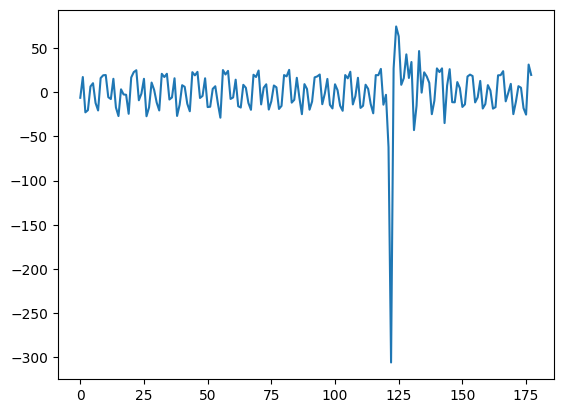

In [436]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 0], float)))
plt.plot(y1)
plt.show()

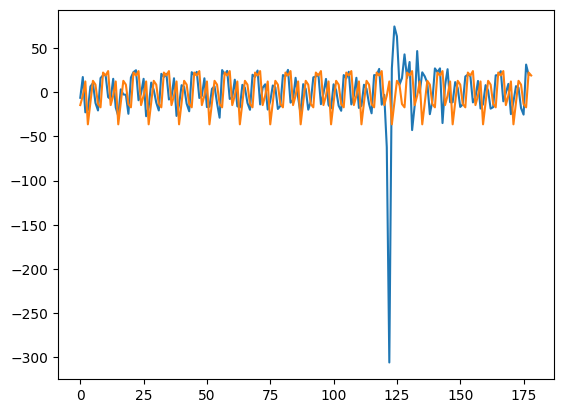

In [437]:
At = np.transpose(x_mes[1:, :]).dot(x_mes[1:, :])
Bt = np.transpose(x_mes[1:, :]).dot(y1)
gamma_est = np.linalg.solve(At,Bt)
#print(gamma_est)
gamma_mes = gamma_est + np.mean(y1)

y_est = np.dot(x_mes, gamma_est)
plt.plot(y1)
plt.plot(y_est)
plt.show()

In [438]:
res = y1 - y_est[1:]
it = np.linalg.inv(At)
var_mes = np.diag(np.var(res,ddof=n_param)*it)
desv_mes = np.sqrt(var_mes)

In [439]:


t_stad = gamma_est/desv_mes



p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)
print(p_val)

[3.08361786e-02 2.48526246e-01 4.16173867e-03 1.90135532e-02
 7.13743024e-01 3.26086473e-03 1.27809554e-02 9.01938797e-01
 7.81643746e-01 9.42563307e-05 3.63763514e-04 6.10116526e-05]


In [440]:
dec = 20
tabla = pd.DataFrame(np.round(np.stack((gamma_est, desv_mes, t_stad, p_val), 1),dec),
                     index = ["const", 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

        beta_hat      desv    t_stad     p_val
const -14.428035  6.625558 -2.177633  0.030836
feb    10.667836  9.212465  1.157978  0.248526
mar    26.768313  9.212465  2.905662  0.004162
abr   -21.817886  9.212465 -2.368301  0.019014
may     3.385190  9.212465  0.367458  0.713743
jun    27.500224  9.212465  2.985110  0.003261
jul    23.187077  9.212465  2.516924  0.012781
ago     1.136818  9.212465  0.123400  0.901939
sep    -2.557609  9.212465 -0.277625  0.781644
oct    36.868224  9.212465  4.001993  0.000094
nov    33.529722  9.212465  3.639604  0.000364
dic    38.544945  9.369955  4.113675  0.000061


#Modelo AR y MA

In [441]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 0], float)))

#unos = np.ones(n)
IPC = 100 * np.diff(np.log(np.array(base[:, 1], float)))
Tasa_delitos = 100 * np.diff(np.log(np.array(base[:, 2], float)))
Escolaridad = 100 * np.diff(np.log(np.array(base[:, 3], float)))

#print(np.exp(energeticos/100))
#print(energeticos)

x1 = np.stack((np.ones(n-1),IPC, Tasa_delitos, Escolaridad), axis = 1)
print(y1.shape)
#print(x1)


(178,)


In [442]:
xm = x_mes[1:, :]
At = np.transpose(xm).dot(xm)
Bt = np.transpose(xm).dot(y1)
n_gamma = len(At)
gamma_est = np.linalg.solve(At,Bt)
y_mes = np.dot(xm,gamma_est)
res_gamma = y1 - y_mes
gamma_mes = gamma_est + np.mean(y1)



it = np.linalg.inv(At)
var_mes = np.diag(np.var(res_gamma,ddof=n_gamma)*it)
desv_mes = np.sqrt(var_mes)


A = np.transpose(x1).dot(x1)
B = np.transpose(x1).dot(y1)
n_beta = len(A)
beta_est =  np.linalg.solve(A,B)
#print(beta_est)

y1_est = x1.dot(beta_est)
e_est = y1 - y1_est

ix = np.linalg.inv(A)
var_x = np.diag(np.var(e_est,ddof=n_beta)*ix)
desv_x = np.sqrt(var_x)

In [443]:
n_param = len(gamma_est)
grad_lib1 = n - n_param
print(grad_lib1)
t_stad1 = gamma_est/desv_mes

n_param = len(beta_est)
grad_lib2 = n - n_param
print(grad_lib2)
t_stad2 = beta_est/desv_x
# print(t_stad1)
# print(t_stad2)
t_stad = np.concatenate((t_stad1, t_stad2))
#print(t_stad)

p_val1 = t.cdf(-np.abs(t_stad1), grad_lib1) + 1 - t.cdf(np.abs(t_stad1), grad_lib1)
p_val2 = t.cdf(-np.abs(t_stad2), grad_lib2) + 1 - t.cdf(np.abs(t_stad2), grad_lib2)

p_val = np.concatenate((p_val1, p_val2))
print(p_val)

167
175
[3.08361786e-02 2.48526246e-01 4.16173867e-03 1.90135532e-02
 7.13743024e-01 3.26086473e-03 1.27809554e-02 9.01938797e-01
 7.81643746e-01 9.42563307e-05 3.63763514e-04 6.10116526e-05
 5.07933503e-01 7.34208405e-02 6.14325537e-08 1.32174198e-02]


In [444]:
esti = np.concatenate((gamma_est, beta_est))
desv = np.concatenate((desv_mes, desv_x))
tabla = pd.DataFrame(np.round(np.stack((esti, desv, t_stad, p_val), 1),5),
                     index = ["const", 'feb', 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'const2', 'IPC', 'T_Del', 'Esc'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

        beta_hat     desv   t_stad    p_val
const  -14.42803  6.62556 -2.17763  0.03084
feb     10.66784  9.21247  1.15798  0.24853
mar     26.76831  9.21247  2.90566  0.00416
abril  -21.81789  9.21247 -2.36830  0.01901
may      3.38519  9.21247  0.36746  0.71374
jun     27.50022  9.21247  2.98511  0.00326
jul     23.18708  9.21247  2.51692  0.01278
ago      1.13682  9.21247  0.12340  0.90194
sep     -2.55761  9.21247 -0.27762  0.78164
oct     36.86822  9.21247  4.00199  0.00009
nov     33.52972  9.21247  3.63960  0.00036
dic     38.54494  9.36995  4.11367  0.00006
const2   1.42154  2.14274  0.66342  0.50793
IPC      0.89548  0.49721  1.80102  0.07342
T_Del    1.76366  0.31170  5.65812  0.00000
Esc    -14.60971  5.83600 -2.50338  0.01322


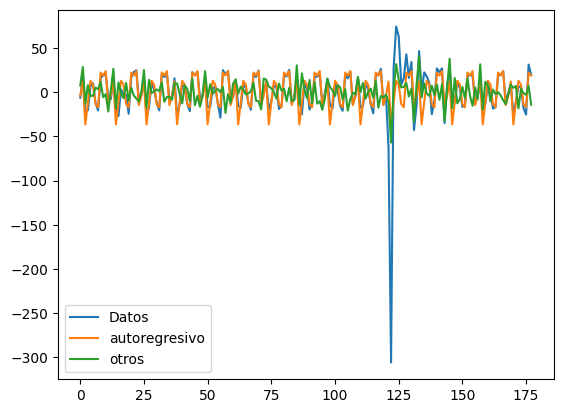

In [445]:
plt.plot(y1, label='Datos')
plt.plot(y_mes,label='autoregresivo')
plt.plot(y1_est,label='otros')
plt.legend()
plt.show()

#Modelo ARIMA

In [446]:
print(x[:,0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [447]:
x = np.stack([np. ones(n-1), t12[1:, 1], t12[1:, 2], t12[1:, 3], t12[1:, 4], t12[1:, 5], t12[1:, 6], t12[1:, 7], t12[1:, 8], t12[1:, 9], t12[1:, 10], t12[1:, 11],IPC, Tasa_delitos, Escolaridad], axis = 1)
A = np.transpose(x).dot(x)
B = np.transpose(x).dot(y1)
n_coef = len(A)
coef_est = np.linalg.solve(A,B)
y2 = np.dot(x,coef_est)
res = y1 - y2
# gamma_mes = gamma_est + np.mean(y1)



i = np.linalg.inv(A)
var = np.diag(np.var(res,ddof=n_coef)*i)
desv = np.sqrt(var)


# A = np.transpose(x1).dot(x1)
# B = np.transpose(x1).dot(y1)
# n_beta = len(A)
# beta_est =  np.linalg.solve(A,B)
# #print(beta_est)

# y1_est = x1.dot(beta_est)
# e_est = y1 - y1_est

# ix = np.linalg.inv(A)
# var_x = np.diag(np.var(e_est,ddof=n_beta)*ix)
# desv_x = np.sqrt(var_x)

In [448]:
grad_lib = n - n_coef
print(grad_lib)
t_stad = coef_est/desv


p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)
print(p_val)

164
[0.91756572 0.96297172 0.34178871 0.49863008 0.22036174 0.31745348
 0.44097358 0.34710738 0.71676933 0.57872585 0.031435   0.06032861
 0.55288814 0.         0.37204017]


In [449]:
tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                     index = ["const", 'feb', 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'IPC', 'T_Del', 'Esc'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

       beta_hat      desv   t_stad    p_val
const  -2.06766  19.94651 -0.10366  0.91757
feb    -0.95771  20.59773 -0.04650  0.96297
mar   -20.00910  20.98701 -0.95340  0.34179
abril -13.98196  20.61769 -0.67815  0.49863
may   -25.52863  20.75061 -1.23026  0.22036
jun    20.62817  20.57138  1.00276  0.31745
jul    15.88849  20.56959  0.77243  0.44097
ago   -19.46834  20.64681 -0.94292  0.34711
sep    -7.48046  20.58429 -0.36341  0.71677
oct    11.49887  20.66818  0.55636  0.57873
nov    44.78918  20.63886  2.17014  0.03143
dic    38.99915  20.61876  1.89144  0.06033
IPC     0.21835   0.36718  0.59466  0.55289
T_Del   3.25130   0.32950  9.86733  0.00000
Esc   -13.63617  15.23407 -0.89511  0.37204


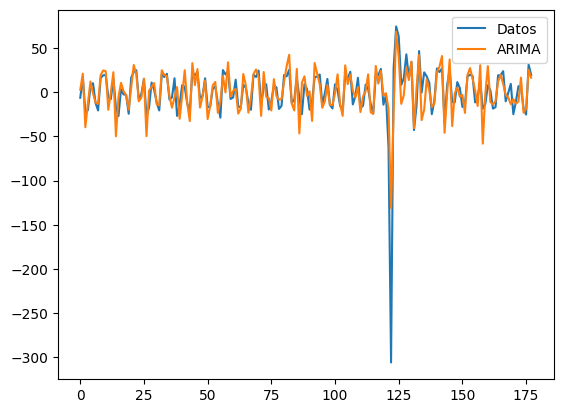

In [450]:
plt.plot(y1, label='Datos')
plt.plot(y2,label='ARIMA')

plt.legend()
plt.show()

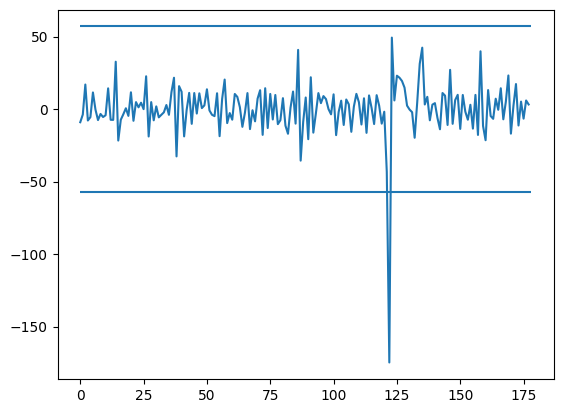

In [451]:
plt.plot(res)
plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
plt.show()

In [452]:
print(n, len(x))
o = np.zeros(n-1)
o[np.argmin(res)] = 1
print(o[np.argmin(res)-2:np.argmin(res)+3], np.argmin(res))

179 178
[0. 0. 1. 0. 0.] 122


          beta_hat      desv    t_stad    p_val
const     -7.60260  10.90363  -0.69725  0.48664
feb        4.49070  11.25927   0.39884  0.69053
mar        7.03456  11.55133   0.60898  0.54338
abril     -4.53074  11.27707  -0.40177  0.68838
may       -8.30088  11.37342  -0.72985  0.46653
jun       22.26645  11.24175   1.98069  0.04931
jul       17.65323  11.24082   1.57046  0.11825
ago       -8.21376  11.29727  -0.72706  0.46823
sep       -6.47123  11.24861  -0.57529  0.56589
oct       24.97347  11.31526   2.20706  0.02871
nov       34.63348  11.29022   3.06757  0.00253
dic       35.15269  11.26904   3.11940  0.00214
IPC        0.67368   0.20199   3.33525  0.00106
T_Del      1.14620   0.20968   5.46639  0.00000
Esc       -7.08859   8.33152  -0.85082  0.39612
2020-03 -256.54065  13.09415 -19.59201  0.00000


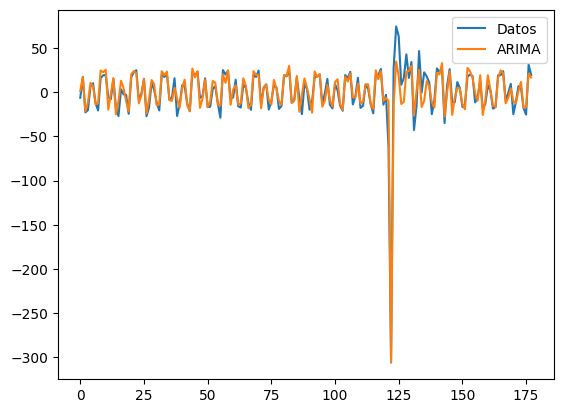

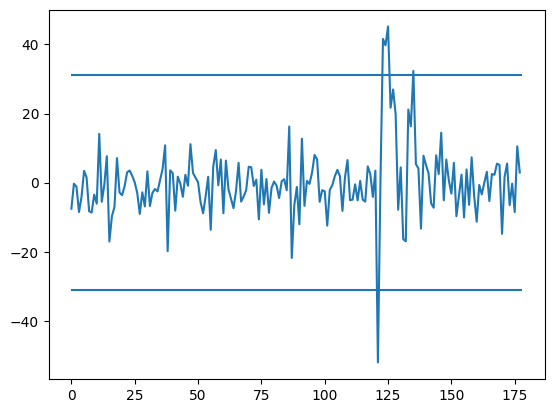

          beta_hat      desv    t_stad    p_val
const     -7.13919   9.89151  -0.72175  0.47149
feb        3.71229  10.21465   0.36343  0.71676
mar       13.43771  10.53318   1.27575  0.20387
abril     -5.81480  10.23222  -0.56828  0.57063
may       -8.53587  10.31745  -0.82732  0.40927
jun       21.74133  10.19831   2.13186  0.03453
jul       17.25722  10.19730   1.69233  0.09251
ago       -8.48995  10.24840  -0.82842  0.40865
sep       -7.55033  10.20575  -0.73981  0.46048
oct       25.57024  10.26510   2.49099  0.01375
nov       33.14379  10.24492   3.23514  0.00147
dic       34.74477  10.22292   3.39871  0.00085
IPC        0.24102   0.19696   1.22368  0.22285
T_Del      0.96635   0.19257   5.01822  0.00000
Esc       -7.01082   7.55793  -0.92761  0.35499
2020-03 -259.82507  11.89099 -21.85059  0.00000
2020-02  -66.24638  11.06251  -5.98837  0.00000


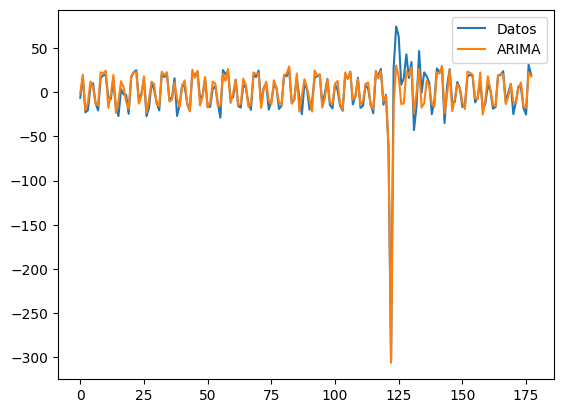

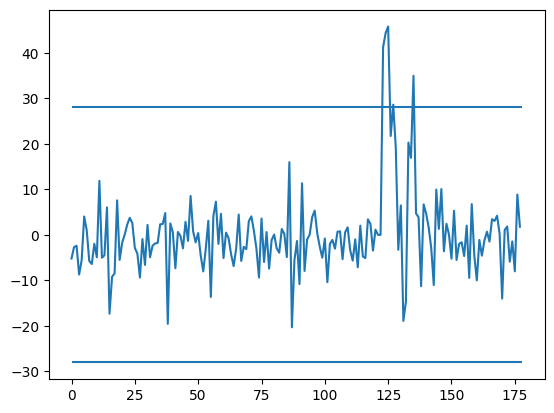

          beta_hat      desv    t_stad    p_val
const     -7.68090   9.13820  -0.84053  0.40186
feb        4.25386   9.43670   0.45078  0.65276
mar       16.01576   9.74231   1.64394  0.10214
abril     -6.07199   9.45250  -0.64237  0.52155
may       -6.88098   9.53613  -0.72157  0.47161
jun       21.91170   9.42110   2.32581  0.02128
jul       14.01408   9.43958   1.48461  0.13960
ago       -7.40567   9.46949  -0.78206  0.43533
sep       -7.42584   9.42795  -0.78764  0.43206
oct       26.84442   9.48574   2.82998  0.00525
nov       32.21034   9.46572   3.40284  0.00084
dic       34.38719   9.44402   3.64116  0.00037
IPC        0.29579   0.18224   1.62306  0.10653
T_Del      0.76953   0.18165   4.23630  0.00004
Esc       -6.38619   6.98288  -0.91455  0.36180
2020-03 -266.36880  11.05252 -24.10028  0.00000
2020-02  -66.86383  10.22004  -6.54242  0.00000
2020-08   51.33421   9.58865   5.35364  0.00000


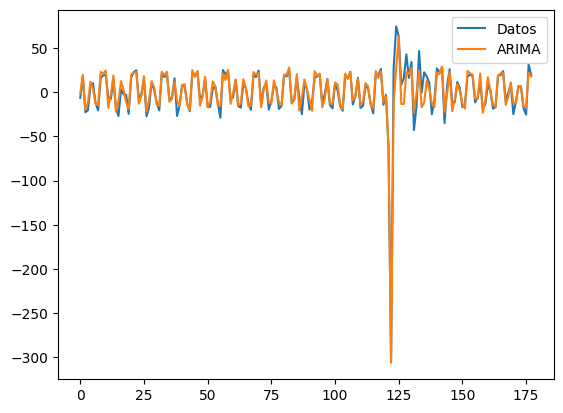

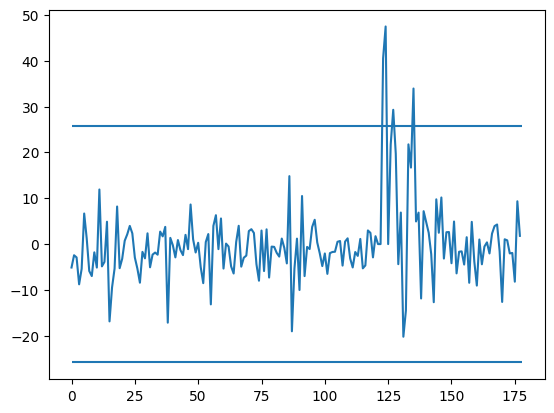

          beta_hat      desv    t_stad    p_val
const     -8.37979   8.14267  -1.02912  0.30498
feb        4.82481   8.40837   0.57381  0.56690
mar       21.32498   8.71829   2.44600  0.01553
abril     -7.01361   8.42324  -0.83265  0.40628
may       -4.26725   8.50595  -0.50168  0.61658
jun       18.08715   8.41448   2.14953  0.03310
jul       13.88235   8.41051   1.65059  0.10078
ago       -5.74271   8.44099  -0.68034  0.49727
sep       -7.65956   8.40021  -0.91183  0.36323
oct       29.17217   8.45914   3.44860  0.00072
nov       30.07832   8.44011   3.56374  0.00048
dic       33.63645   8.41523   3.99709  0.00010
IPC        0.21002   0.16290   1.28920  0.19919
T_Del      0.37442   0.17281   2.16663  0.03174
Esc       -5.33215   6.22372  -0.85675  0.39287
2020-03 -278.41237  10.01917 -27.78796  0.00000
2020-02  -72.12727   9.14155  -7.89005  0.00000
2020-08   55.30044   8.56492   6.45662  0.00000
2020-07   58.35805   8.94645   6.52304  0.00000


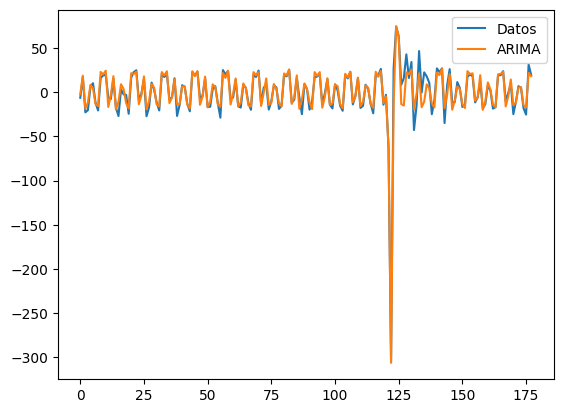

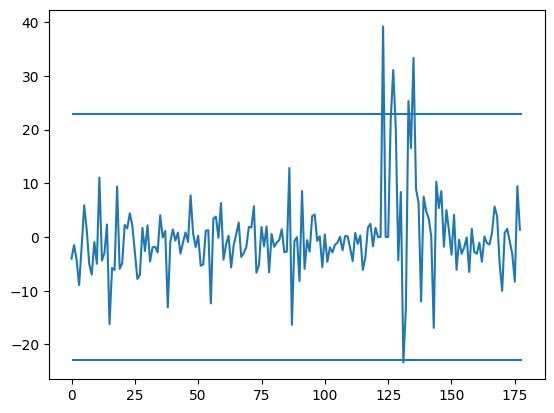

          beta_hat     desv    t_stad    p_val
const     -8.21083  7.48634  -1.09678  0.27440
feb        4.66147  7.73062   0.60299  0.54738
mar       20.43427  8.01714   2.54882  0.01176
abril     -6.90676  7.74425  -0.89186  0.37382
may       -7.62224  7.84415  -0.97171  0.33267
jun       18.11934  7.73618   2.34216  0.02041
jul       13.88077  7.73253   1.79511  0.07453
ago       -6.09243  7.76081  -0.78502  0.43361
sep       -7.68117  7.72305  -0.99458  0.32145
oct       28.74489  7.77763   3.69584  0.00030
nov       30.40999  7.75997   3.91883  0.00013
dic       33.76062  7.73690   4.36358  0.00002
IPC        0.19977  0.14978   1.33371  0.18421
T_Del      0.44197  0.15936   2.77348  0.00621
Esc       -5.53781  5.72214  -0.96779  0.33462
2020-03 -276.21410  9.22022 -29.95742  0.00000
2020-02  -71.73956  8.40493  -8.53542  0.00000
2020-08   54.55048  7.87567   6.92645  0.00000
2020-07   57.17893  8.22807   6.94925  0.00000
2020-06   42.26889  7.70382   5.48674  0.00000


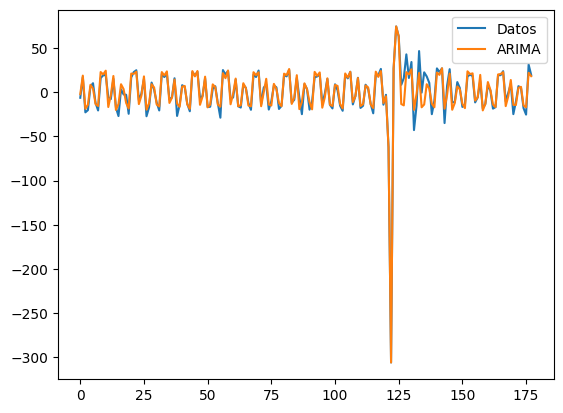

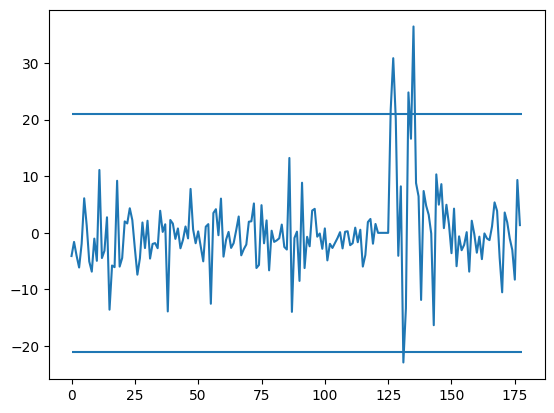

          beta_hat     desv    t_stad    p_val
const     -7.83440  6.84416  -1.14468  0.25407
feb        4.21621  7.06759   0.59656  0.55166
mar       19.71258  7.33019   2.68923  0.00793
abril     -7.05699  7.07966  -0.99680  0.32039
may      -11.42538  7.20232  -1.58635  0.11466
jun       17.95824  7.07229   2.53924  0.01208
jul       13.76982  7.06892   1.94794  0.05319
ago       -6.70344  7.09557  -0.94474  0.34624
sep       -7.98039  7.06043  -1.13030  0.26006
oct       28.22838  7.11071   3.96984  0.00011
nov       30.55819  7.09403   4.30759  0.00003
dic       33.85298  7.07291   4.78629  0.00000
IPC        0.07733  0.13863   0.55783  0.57775
T_Del      0.50258  0.14607   3.44064  0.00074
Esc       -5.83799  5.23131  -1.11597  0.26613
2020-03 -273.60950  8.44145 -32.41261  0.00000
2020-02  -73.72009  7.69155  -9.58456  0.00000
2020-08   53.55115  7.20192   7.43568  0.00000
2020-07   56.57506  7.52266   7.52061  0.00000
2020-06   45.47528  7.06538   6.43635  0.00000
2021-09   40.

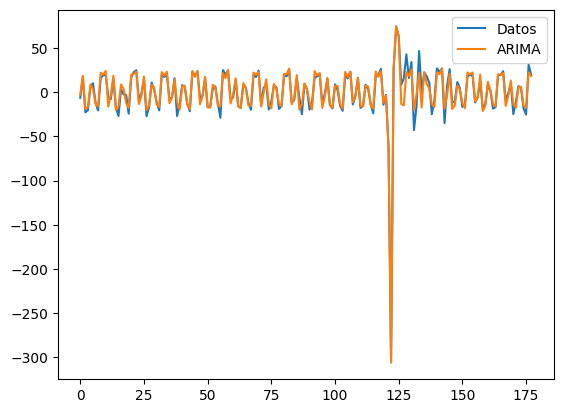

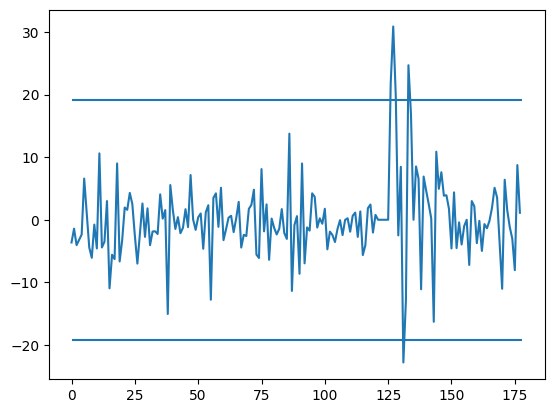

          beta_hat     desv    t_stad    p_val
const     -7.91350  6.35699  -1.24485  0.21504
feb        4.26381  6.56451   0.64952  0.51695
mar       20.57783  6.81053   3.02147  0.00294
abril     -7.24485  6.57582  -1.10174  0.27226
may      -11.05237  6.69004  -1.65206  0.10052
jun       17.86053  6.56889   2.71896  0.00729
jul       13.73242  6.56574   2.09153  0.03809
ago       -6.48002  6.59064  -0.98322  0.32701
sep      -10.28722  6.57345  -1.56497  0.11960
oct       28.58300  6.60492   4.32753  0.00003
nov       30.19322  6.58945   4.58205  0.00001
dic       33.72944  6.56949   5.13426  0.00000
IPC        0.04677  0.12890   0.36286  0.71720
T_Del      0.43905  0.13625   3.22244  0.00155
Esc       -5.68562  4.85902  -1.17011  0.24373
2020-03 -275.45264  7.84890 -35.09442  0.00000
2020-02  -74.91121  7.14786 -10.48023  0.00000
2020-08   54.14064  6.69026   8.09245  0.00000
2020-07   57.84523  6.99162   8.27351  0.00000
2020-06   45.26024  6.56258   6.89671  0.00000
2021-09   40.

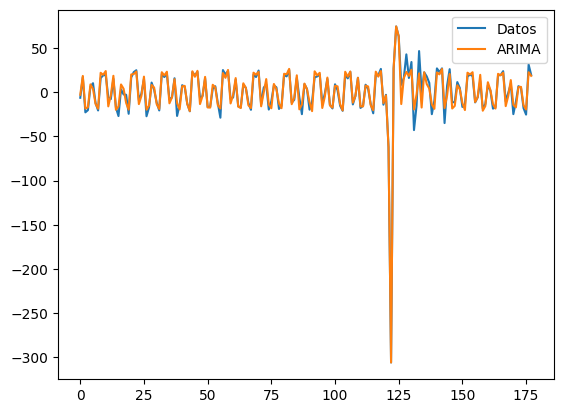

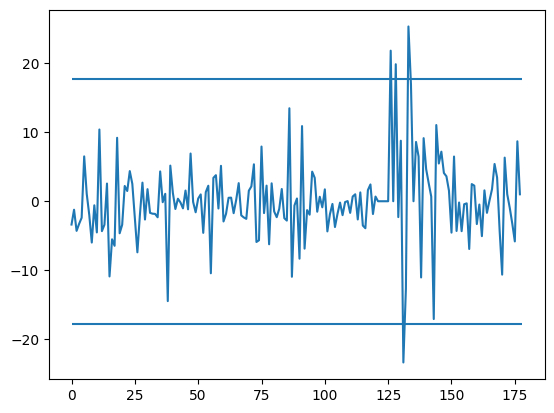

          beta_hat     desv    t_stad    p_val
const     -8.08306  5.99629  -1.34801  0.17961
feb        4.38798  6.19196   0.70866  0.47959
mar       20.06115  6.42498   3.12237  0.00214
abril     -7.54180  6.20292  -1.21585  0.22588
may      -10.33135  6.31234  -1.63669  0.10371
jun       17.71447  6.19613   2.85896  0.00483
jul       13.68150  6.19308   2.20916  0.02862
ago       -6.04689  6.21729  -0.97259  0.33226
sep      -10.42667  6.20041  -1.68161  0.09465
oct       29.22457  6.23165   4.68970  0.00001
nov       29.57175  6.21696   4.75663  0.00000
dic       33.51478  6.19679   5.40841  0.00000
IPC        0.00839  0.12188   0.06887  0.94518
T_Del      0.32733  0.13088   2.50099  0.01342
Esc       -5.40201  4.58366  -1.17854  0.24038
2020-03 -278.77914  7.44005 -37.47007  0.00000
2020-02  -74.66239  6.74237 -11.07361  0.00000
2020-08   55.22138  6.31507   8.74438  0.00000
2020-07   60.01703  6.61234   9.07652  0.00000
2020-06   44.86215  6.19072   7.24668  0.00000
2021-09   40.

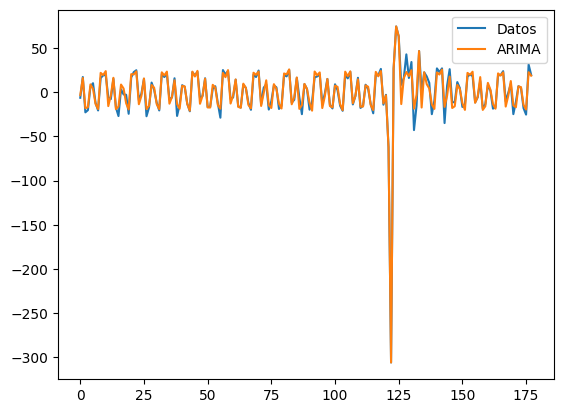

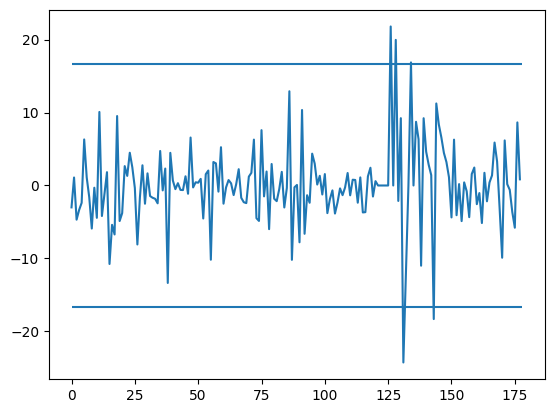

          beta_hat     desv    t_stad    p_val
const    -14.21252  5.74876  -2.47228  0.01451
feb       10.47350  5.92540   1.76756  0.07910
mar       27.39591  6.19682   4.42097  0.00002
abril     -1.85790  5.91829  -0.31392  0.75400
may       -3.67749  6.06112  -0.60673  0.54491
jun       23.54289  5.91810   3.97812  0.00011
jul       19.60141  5.91921   3.31149  0.00115
ago        0.33361  5.96180   0.05596  0.95545
sep       -4.59282  5.92225  -0.77552  0.43921
oct       35.80540  5.98421   5.98332  0.00000
nov       34.94661  5.91877   5.90437  0.00000
dic       39.27910  5.91601   6.63946  0.00000
IPC       -0.02916  0.11423  -0.25532  0.79881
T_Del      0.22067  0.12435   1.77450  0.07794
Esc        1.26646  4.50310   0.28124  0.77890
2020-03 -281.94984  6.98761 -40.34996  0.00000
2020-02  -76.30170  6.31345 -12.08557  0.00000
2020-08   56.25053  5.90862   9.52008  0.00000
2020-07   62.09413  6.19768  10.01893  0.00000
2020-06   44.48328  5.78903   7.68407  0.00000
2021-09   40.

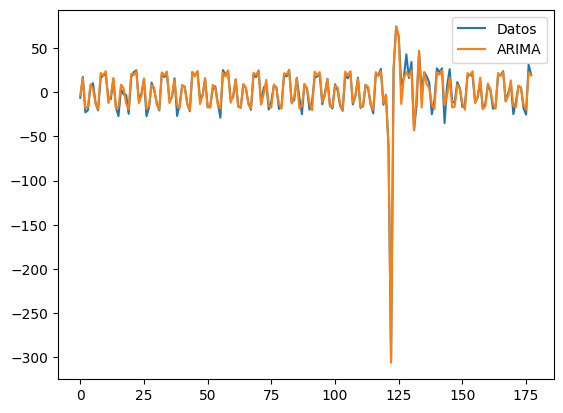

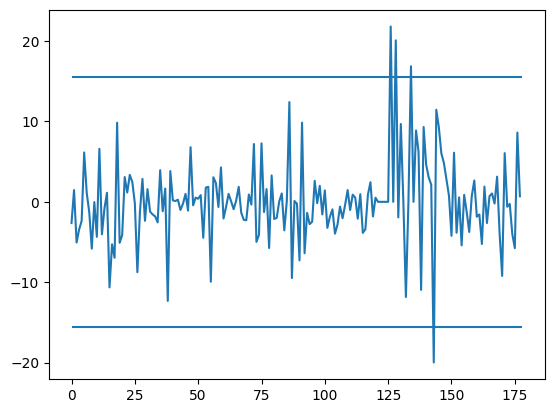

          beta_hat     desv    t_stad    p_val
const    -14.21307  5.44929  -2.60825  0.01000
feb       10.47293  5.61672   1.86460  0.06414
mar       27.40710  5.87400   4.66583  0.00001
abril     -1.86034  5.60998  -0.33161  0.74063
may       -3.67668  5.74537  -0.63994  0.52316
jun       23.54199  5.60980   4.19658  0.00005
jul       19.60200  5.61086   3.49359  0.00062
ago       -1.22382  5.66288  -0.21611  0.82919
sep       -4.59493  5.61374  -0.81852  0.41433
oct       35.80980  5.67247   6.31291  0.00000
nov       34.94338  5.61044   6.22828  0.00000
dic       39.27979  5.60782   7.00447  0.00000
IPC       -0.03071  0.10828  -0.28366  0.77705
T_Del      0.22001  0.11788   1.86643  0.06388
Esc        1.26912  4.26852   0.29732  0.76662
2020-03 -281.96205  6.62360 -42.56930  0.00000
2020-02  -76.33859  5.98457 -12.75590  0.00000
2020-08   56.25308  5.60082  10.04373  0.00000
2020-07   62.11223  5.87483  10.57261  0.00000
2020-06   44.48266  5.48746   8.10624  0.00000
2021-09   40.

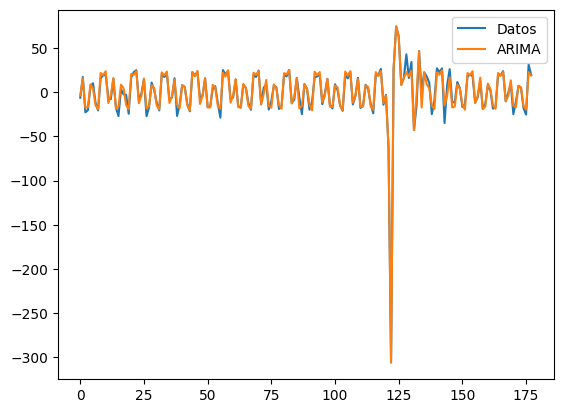

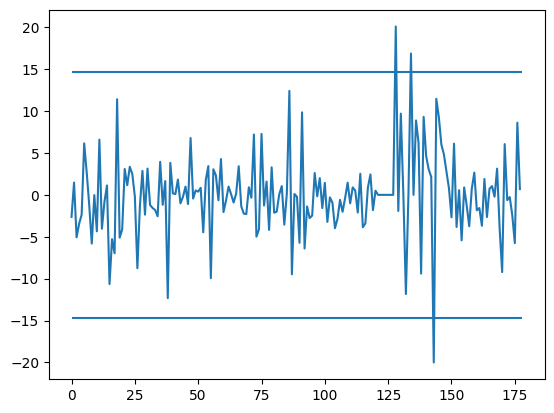

          beta_hat     desv    t_stad    p_val
const    -14.31610  5.17994  -2.76376  0.00642
feb       10.58419  5.33911   1.98239  0.04923
mar       27.67497  5.58397   4.95614  0.00000
abril     -1.83621  5.33263  -0.34433  0.73107
may       -3.41811  5.46168  -0.62583  0.53236
jun       23.58073  5.33247   4.42210  0.00002
jul       19.63996  5.33347   3.68240  0.00032
ago       -1.05738  5.38306  -0.19643  0.84454
sep       -4.53124  5.33623  -0.84915  0.39713
oct       34.53621  5.40070   6.39476  0.00000
nov       34.88792  5.33308   6.54179  0.00000
dic       39.26834  5.33058   7.36662  0.00000
IPC       -0.01249  0.10302  -0.12125  0.90365
T_Del      0.19999  0.11215   1.78317  0.07654
Esc        1.37003  4.05756   0.33765  0.73609
2020-03 -282.69836  6.29862 -44.88256  0.00000
2020-02  -76.13274  5.68892 -13.38264  0.00000
2020-08   56.51913  5.32431  10.61531  0.00000
2020-07   62.40082  5.58481  11.17331  0.00000
2020-06   44.37862  5.21623   8.50780  0.00000
2021-09   40.

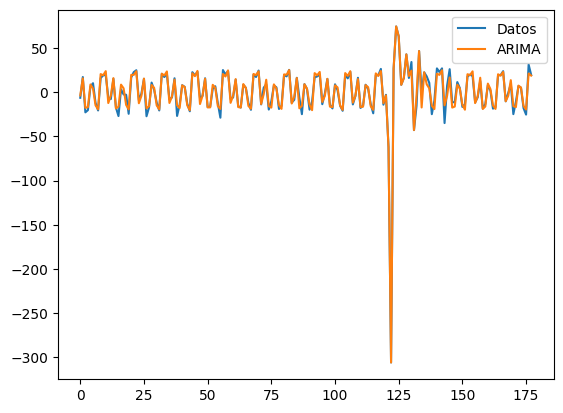

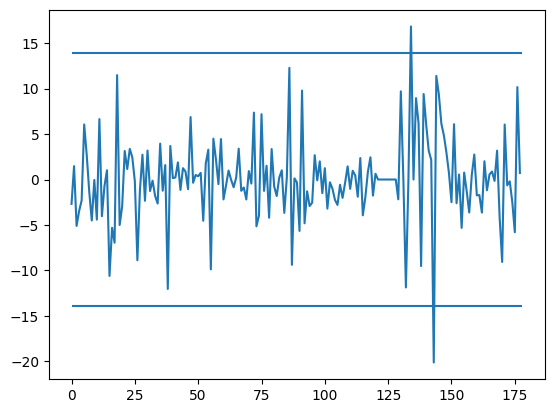

          beta_hat     desv    t_stad    p_val
const     -8.40383  5.01257  -1.67655  0.09569
feb        4.61550  5.16000   0.89448  0.37248
mar       23.16157  5.31840   4.35498  0.00002
abril     -8.25874  5.17866  -1.59476  0.11284
may       -8.75370  5.24070  -1.67033  0.09691
jun       17.32789  5.16914   3.35218  0.00101
jul       13.49836  5.16403   2.61392  0.00985
ago       -6.69034  5.18302  -1.29082  0.19873
sep      -10.78700  5.17270  -2.08537  0.03871
oct       29.13790  5.18786   5.61655  0.00000
nov       28.12095  5.19880   5.40913  0.00000
dic       32.95689  5.17064   6.37385  0.00000
IPC       -0.06498  0.09715  -0.66890  0.50458
T_Del      0.07827  0.10820   0.72338  0.47056
Esc       -1.67451  3.85590  -0.43427  0.66471
2020-03 -286.26290  5.94922 -48.11775  0.00000
2020-02  -78.19925  5.34770 -14.62296  0.00000
2020-08   57.66579  4.99402  11.54696  0.00000
2020-07   64.80978  5.25708  12.32809  0.00000
2020-06   43.95882  4.88764   8.99387  0.00000
2021-09   40.

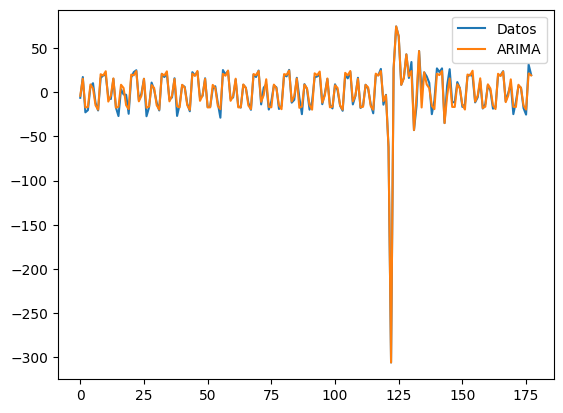

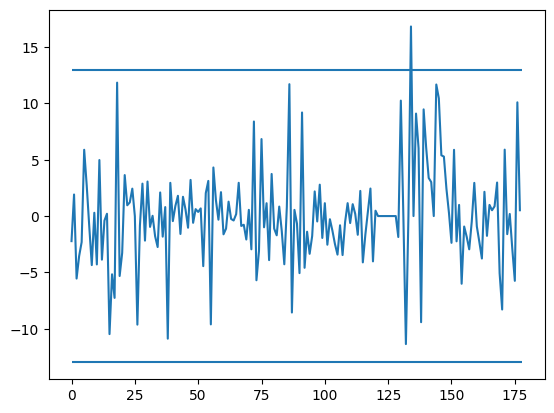

          beta_hat     desv    t_stad    p_val
const     -8.36067  4.79242  -1.74456  0.08310
feb        4.56462  4.93338   0.92525  0.35631
mar       23.08705  5.08484   4.54037  0.00001
abril     -9.57589  4.96272  -1.92957  0.05554
may       -8.86264  5.01060  -1.76878  0.07895
jun       17.30693  4.94210   3.50194  0.00061
jul       13.48329  4.93721   2.73095  0.00707
ago       -6.75817  4.95540  -1.36380  0.17466
sep      -10.82316  4.94551  -2.18848  0.03017
oct       29.08427  4.96002   5.86374  0.00000
nov       28.13179  4.97045   5.65981  0.00000
dic       32.96335  4.94353   6.66798  0.00000
IPC       -0.07853  0.09295  -0.84491  0.39950
T_Del      0.08442  0.10346   0.81600  0.41578
Esc       -1.70855  3.68655  -0.46346  0.64371
2020-03 -284.69546  5.70211 -49.92811  0.00000
2020-02  -78.42406  5.11314 -15.33774  0.00000
2020-08   57.56110  4.77475  12.05532  0.00000
2020-07   64.75295  5.02620  12.88308  0.00000
2020-06   44.00115  4.67298   9.41608  0.00000
2021-09   40.

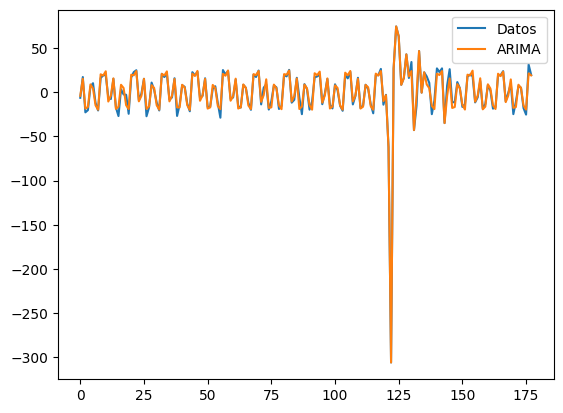

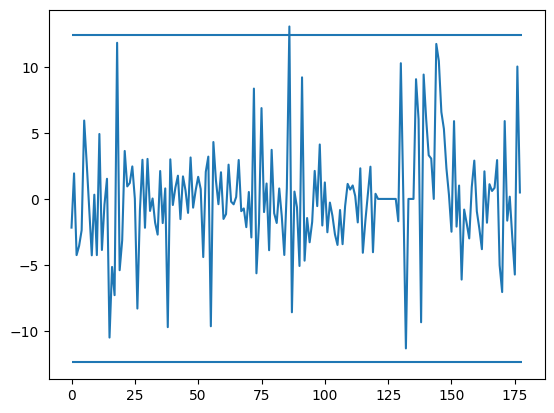

          beta_hat     desv    t_stad    p_val
const     -8.29351  4.65618  -1.78118  0.07691
feb        4.49917  4.79312   0.93867  0.34941
mar       22.61381  4.94252   4.57536  0.00001
abril    -10.58802  4.83229  -2.19110  0.02999
may       -9.18351  4.86917  -1.88605  0.06122
jun       17.36245  4.80159   3.61598  0.00041
jul       13.52020  4.79682   2.81857  0.00547
ago       -6.93646  4.81481  -1.44065  0.15177
sep      -10.79173  4.80488  -2.24599  0.02617
oct       28.86963  4.81944   5.99024  0.00000
nov       28.36969  4.82969   5.87402  0.00000
dic       33.07853  4.80308   6.88694  0.00000
IPC       -0.08735  0.09035  -0.96677  0.33522
T_Del      0.12536  0.10136   1.23678  0.21810
Esc       -1.84564  3.58198  -0.51526  0.60713
2020-03 -282.23743  5.59471 -50.44723  0.00000
2020-02  -78.26696  4.96798 -15.75427  0.00000
2020-08   57.09921  4.64128  12.30247  0.00000
2020-07   64.04898  4.88838  13.10229  0.00000
2020-06   44.17678  4.54043   9.72965  0.00000
2021-09   40.

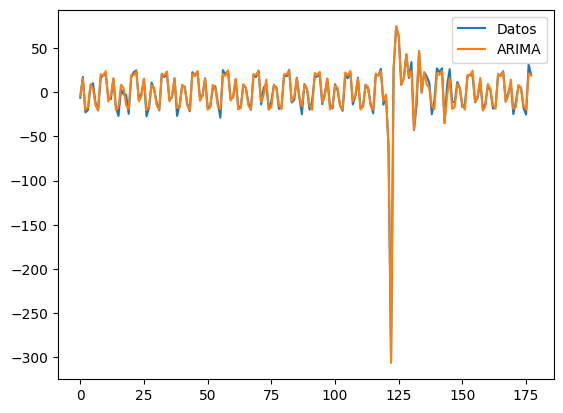

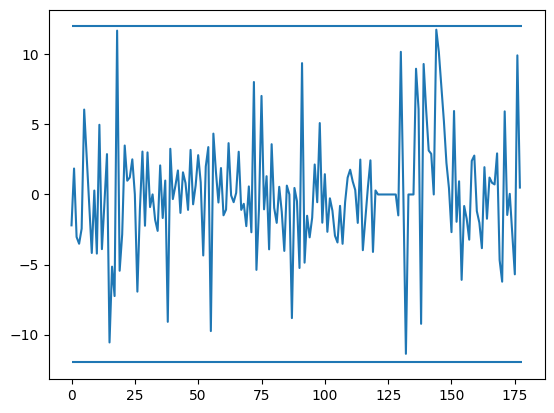

In [453]:
def outlayers(a, b, res, tabla, m, iter):
  x = np.copy(a)
  y1 = np.copy(b)
  for _ in range(iter):
    o = np.zeros((n-1,1))
    ir = np.argmax(np.abs(res))
    o[ir] = 1
    ind = list(tabla.index)
    ind.append(m[ir])
    m = np.delete(m,ir)
    x = np.append(x, o, axis = 1)
    A = np.transpose(x).dot(x)
    B = np.transpose(x).dot(y1)
    n_coef = len(A)
    coef_est = np.linalg.solve(A,B)
    y2 = np.dot(x,coef_est)
    res = y1 - y2

    i = np.linalg.inv(A)
    var = np.diag(np.var(res,ddof=n_coef)*i)
    desv = np.sqrt(var)

    grad_lib = n - n_coef
    t_stad = coef_est/desv

    p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


    tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                        index = ind,
                        columns = ['beta_hat', 'desv', 't_stad', 'p_val'])
    print(tabla)

    plt.plot(y1, label='Datos')
    plt.plot(y2,label='ARIMA')

    plt.legend()
    plt.show()
    plt.plot(res)
    plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
    plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
    plt.show()
  return x, tabla
x, tablao = outlayers(x,y1,res,tabla, m,14)

#Puliendo el Arima

In [426]:
# x = np.stack([np. ones(n-1), t12[1:, 2], t12[1:, 3], t12[1:, 4], t12[1:, 5], t12[1:, 6], t12[1:, 7], t12[1:, 8], t12[1:, 9], t12[1:, 10], t12[1:, 11],IPC, Tasa_delitos, Escolaridad, o], axis = 1)
# A = np.transpose(x).dot(x)
# B = np.transpose(x).dot(y1)
# n_coef = len(A)
# coef_est = np.linalg.solve(A,B)
# y2 = np.dot(x,coef_est)
# res = y1 - y2

# i = np.linalg.inv(A)
# var = np.diag(np.var(res,ddof=n_coef)*i)
# desv = np.sqrt(var)

# grad_lib = n - n_coef
# t_stad = coef_est/desv

# p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


# tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
#                      index = ["const", 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'IPC', 'T_Del', 'Esc', 'atipico'],
#                      columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

# print(tabla)

# plt.plot(y1, label='Datos')
# plt.plot(y2,label='ARIMA')

# plt.legend()
# plt.show()

# plt.plot(res)
# plt.hlines(3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
# plt.hlines(-3*np.std(res, ddof = 1), xmin=0, xmax = n-1)
# plt.show()

          beta_hat     desv    t_stad    p_val
const    -10.59764  1.29409  -8.18923  0.00000
feb        6.80317  1.72183   3.95112  0.00012
mar       24.96255  1.90569  13.09896  0.00000
abril     -8.29966  1.89972  -4.36888  0.00002
may       -6.85120  1.78989  -3.82772  0.00019
jun       19.65301  1.81019  10.85690  0.00000
jul       15.81276  1.78801   8.84375  0.00000
ago       -4.62001  1.71940  -2.68699  0.00802
sep       -8.49843  1.80589  -4.70595  0.00001
oct       31.18996  1.71271  18.21085  0.00000
nov       30.64010  1.97250  15.53365  0.00000
dic       35.36238  1.84556  19.16077  0.00000
IPC       -0.08629  0.09010  -0.95768  0.33975
T_Del      0.12084  0.10073   1.19963  0.23216
2020-03 -282.38910  5.57326 -50.66854  0.00000
2020-02  -78.28262  4.95571 -15.79644  0.00000
2020-08   57.15043  4.62884  12.34659  0.00000
2020-07   64.12635  4.87410  13.15656  0.00000
2020-06   44.15729  4.52914   9.74960  0.00000
2021-09   40.39016  4.57989   8.81903  0.00000
2021-01   35.

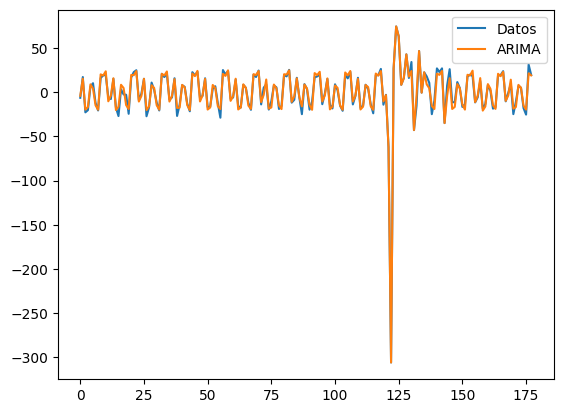

          beta_hat     desv    t_stad    p_val
const    -10.72847  1.28651  -8.33920  0.00000
feb        6.99133  1.71011   4.08822  0.00007
mar       24.82383  1.89966  13.06754  0.00000
abril     -8.10718  1.88854  -4.29282  0.00003
may       -6.55812  1.76305  -3.71976  0.00028
jun       19.77407  1.80527  10.95352  0.00000
jul       15.86904  1.78656   8.88246  0.00000
ago       -4.44782  1.70951  -2.60182  0.01019
sep       -8.29785  1.79321  -4.62737  0.00001
oct       31.21630  1.71202  18.23358  0.00000
nov       30.75529  1.96829  15.62541  0.00000
dic       35.35967  1.84505  19.16458  0.00000
T_Del      0.12657  0.10052   1.25907  0.20994
2020-03 -282.71123  5.56158 -50.83293  0.00000
2020-02  -76.48197  4.58393 -16.68482  0.00000
2020-08   57.33810  4.62342  12.40165  0.00000
2020-07   63.67689  4.85012  13.12894  0.00000
2020-06   44.06789  4.52694   9.73459  0.00000
2021-09   39.71406  4.52391   8.77871  0.00000
2021-01   34.89111  4.51885   7.72123  0.00000
2021-08   30.

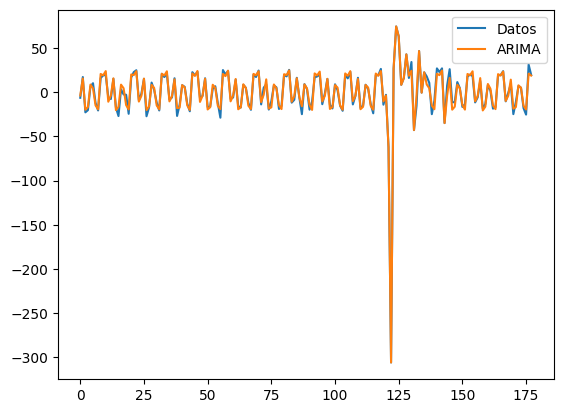

          beta_hat     desv    t_stad    p_val
const    -10.36813  1.25669  -8.25038  0.00000
feb        6.60793  1.68602   3.91925  0.00013
mar       25.78544  1.74271  14.79618  0.00000
abril     -8.92334  1.77722  -5.02095  0.00000
may       -6.19548  1.74271  -3.55509  0.00050
jun       19.04279  1.71257  11.11940  0.00000
jul       15.21465  1.71257   8.88408  0.00000
ago       -4.48223  1.71257  -2.61725  0.00975
sep       -8.98048  1.71257  -5.24385  0.00000
oct       31.33812  1.71257  18.29884  0.00000
nov       29.46982  1.68602  17.47892  0.00000
dic       34.48504  1.71257  20.13638  0.00000
2020-03 -286.78709  4.53104 -63.29381  0.00000
2020-02  -77.52157  4.51762 -17.15983  0.00000
2020-08   58.68782  4.50608  13.02414  0.00000
2020-07   65.96298  4.50608  14.63866  0.00000
2020-06   43.56027  4.51762   9.64231  0.00000
2021-09   39.25123  4.51762   8.68848  0.00000
2021-01   35.44448  4.50608   7.86592  0.00000
2021-08   31.36612  4.51762   6.94306  0.00000
2021-06  -32.

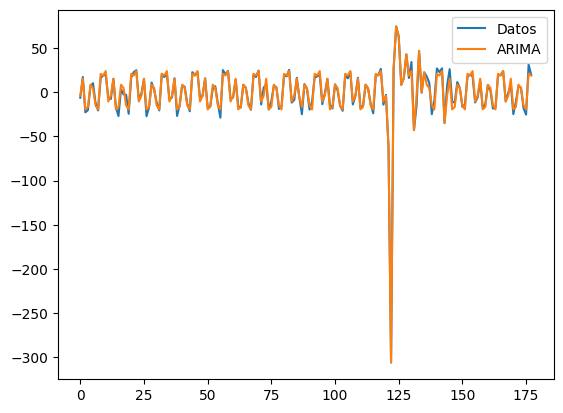

,beta_hat,desv,t_stad,p_val
const,-10.36813,1.25669,-8.25038,0.00000
feb,6.60793,1.68602,3.91925,0.00013
mar,25.78544,1.74271,14.79618,0.00000
abril,-8.92334,1.77722,-5.02095,0.00000
may,-6.19548,1.74271,-3.55509,0.00050
jun,19.04279,1.71257,11.11940,0.00000
jul,15.21465,1.71257,8.88408,0.00000
ago,-4.48223,1.71257,-2.61725,0.00975
sep,-8.98048,1.71257,-5.24385,0.00000
oct,31.33812,1.71257,18.29884,0.00000


In [454]:
def pulido(a, b, tabla, iter):
  x = np.copy(a)
  y1 = np.copy(b)
  for _ in range(iter):
    ns = tabla['p_val'].to_numpy()[1:]
    i = 1+np.argmax(ns)
    x = np.delete(x,i,1)
    ind = np.delete(tabla.index,i)
    A = np.transpose(x).dot(x)
    B = np.transpose(x).dot(y1)
    n_coef = len(A)
    coef_est = np.linalg.solve(A,B)
    y2 = np.dot(x,coef_est)
    res = y1 - y2

    i = np.linalg.inv(A)
    var = np.diag(np.var(res,ddof=n_coef)*i)
    desv = np.sqrt(var)

    grad_lib = n - n_coef
    t_stad = coef_est/desv

    p_val = t.cdf(-np.abs(t_stad), grad_lib) + 1 - t.cdf(np.abs(t_stad), grad_lib)


    tabla = pd.DataFrame(np.round(np.stack((coef_est, desv, t_stad, p_val), 1),5),
                        index = ind,
                        columns = ['beta_hat', 'desv', 't_stad', 'p_val'])
    print(tabla)

    plt.plot(y1, label='Datos')
    plt.plot(y2,label='ARIMA')

    plt.legend()
    plt.show()
  return tabla
pulido(x,y1,tablao,3)

Se volvio un AR

#ARIMAX

In [467]:
a = [1,2,3, 4, 5, 6]
print(a[:-2])
print(a[2:])

[1, 2, 3, 4]
[3, 4, 5, 6]


In [487]:
def lag(x, n):
  l = [x[n:]]
  for i in range(1,n+1):
    l.append(x[n-i:-i])


  return np.transpose(l)
lag(a,1)

array([[2, 1],
       [3, 2],
       [4, 3],
       [5, 4],
       [6, 5]])

In [492]:
##Variable Exógena
y = 100 * np.diff(np.log(np.array(base[:, 0], float)))

IPC = 100 * np.diff(np.log(np.array(base[:, 1], float)))
Tasa_delitos = 100 * np.diff(np.log(np.array(base[:, 2], float)))
Escolaridad = 100 * np.diff(np.log(np.array(base[:, 3], float)))

x1 = np.stack((np.ones(n-1),IPC, Tasa_delitos, Escolaridad), axis = 1)
print(y1.shape)
#print(x1)


(178,)


In [491]:
yl = lag(y)
yl

NameError: name 'y' is not defined

In [455]:
meses = np.array([])
for i in range(0,n):
  meses = np.append(meses,m[i][-2:])

t12 = pd.get_dummies(meses).to_numpy()
print(t12)
x_mes = np.stack([np. ones(n), t12[:, 1], t12[:, 2], t12[:, 3], t12[:, 4], t12[:, 5], t12[:, 6], t12[:, 7], t12[:, 8], t12[:, 9], t12[:, 10], t12[:, 11]], axis = 1)

n_param = len(x_mes[1,:])
grad_lib = n - n_param
print(n, grad_lib, n_param)

[[ True False False ... False False False]
 [False  True False ... False False False]
 [False False  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ...  True False False]
 [False False False ... False  True False]]
179 167 12


In [ ]:
##Variable Exógena
y1 = 100 * np.diff(np.log(np.array(base[:, 0], float)))

#unos = np.ones(n)
IPC = 100 * np.diff(np.log(np.array(base[:, 1], float)))
Tasa_delitos = 100 * np.diff(np.log(np.array(base[:, 2], float)))
Escolaridad = 100 * np.diff(np.log(np.array(base[:, 3], float)))

#print(np.exp(energeticos/100))
#print(energeticos)

x1 = np.stack((np.ones(n-1),IPC, Tasa_delitos, Escolaridad), axis = 1)
print(y1.shape)
#print(x1)


(178,)


In [ ]:
xm = x_mes[1:, :]
At = np.transpose(xm).dot(xm)
Bt = np.transpose(xm).dot(y1)
n_gamma = len(At)
gamma_est = np.linalg.solve(At,Bt)
y_mes = np.dot(xm,gamma_est)
res_gamma = y1 - y_mes
gamma_mes = gamma_est + np.mean(y1)



it = np.linalg.inv(At)
var_mes = np.diag(np.var(res_gamma,ddof=n_gamma)*it)
desv_mes = np.sqrt(var_mes)


A = np.transpose(x1).dot(x1)
B = np.transpose(x1).dot(y1)
n_beta = len(A)
beta_est =  np.linalg.solve(A,B)
#print(beta_est)

y1_est = x1.dot(beta_est)
e_est = y1 - y1_est

ix = np.linalg.inv(A)
var_x = np.diag(np.var(e_est,ddof=n_beta)*ix)
desv_x = np.sqrt(var_x)

In [ ]:
n_param = len(gamma_est)
grad_lib1 = n - n_param
print(grad_lib1)
t_stad1 = gamma_est/desv_mes

n_param = len(beta_est)
grad_lib2 = n - n_param
print(grad_lib2)
t_stad2 = beta_est/desv_x
# print(t_stad1)
# print(t_stad2)
t_stad = np.concatenate((t_stad1, t_stad2))
#print(t_stad)

p_val1 = t.cdf(-np.abs(t_stad1), grad_lib1) + 1 - t.cdf(np.abs(t_stad1), grad_lib1)
p_val2 = t.cdf(-np.abs(t_stad2), grad_lib2) + 1 - t.cdf(np.abs(t_stad2), grad_lib2)

p_val = np.concatenate((p_val1, p_val2))
print(p_val)

167
175
[3.08361786e-02 2.48526246e-01 4.16173867e-03 1.90135532e-02
 7.13743024e-01 3.26086473e-03 1.27809554e-02 9.01938797e-01
 7.81643746e-01 9.42563307e-05 3.63763514e-04 6.10116526e-05
 5.07933503e-01 7.34208405e-02 6.14325537e-08 1.32174198e-02]


In [ ]:
esti = np.concatenate((gamma_est, beta_est))
desv = np.concatenate((desv_mes, desv_x))
tabla = pd.DataFrame(np.round(np.stack((esti, desv, t_stad, p_val), 1),5),
                     index = ["const", 'feb', 'mar', 'abril', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic', 'const2', 'IPC', 'T_Del', 'Esc'],
                     columns = ['beta_hat', 'desv', 't_stad', 'p_val'])

print(tabla)

        beta_hat     desv   t_stad    p_val
const  -14.42803  6.62556 -2.17763  0.03084
feb     10.66784  9.21247  1.15798  0.24853
mar     26.76831  9.21247  2.90566  0.00416
abril  -21.81789  9.21247 -2.36830  0.01901
may      3.38519  9.21247  0.36746  0.71374
jun     27.50022  9.21247  2.98511  0.00326
jul     23.18708  9.21247  2.51692  0.01278
ago      1.13682  9.21247  0.12340  0.90194
sep     -2.55761  9.21247 -0.27762  0.78164
oct     36.86822  9.21247  4.00199  0.00009
nov     33.52972  9.21247  3.63960  0.00036
dic     38.54494  9.36995  4.11367  0.00006
const2   1.42154  2.14274  0.66342  0.50793
IPC      0.89548  0.49721  1.80102  0.07342
T_Del    1.76366  0.31170  5.65812  0.00000
Esc    -14.60971  5.83600 -2.50338  0.01322
